In [27]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans, AffinityPropagation
import warnings

In [28]:
os.chdir('D:/Penn/Career/Citadel/2021datathon')
df = pd.read_csv('team_attributes.csv')

In [29]:
id_fts = [
    'team_id', # will be dropped during clustering
    'date' # will be dropped during clustering
]

cat_fts = [
    'buildUpPlayPositioningClass',
    'chanceCreationPositioningClass',
    'defenceDefenderLineClass'
]

features = id_fts + [
    'buildUpPlaySpeed',
    'buildUpPlayDribbling',
    'buildUpPlayPassing',
    'chanceCreationPassing',
    'chanceCreationCrossing',
    'chanceCreationShooting',
    'defencePressure',
    'defenceAggression',
    'defenceTeamWidth'
] + cat_fts

df_1 = pd.get_dummies(data = df[features], columns = cat_fts)
df_1.columns.values

array(['team_id', 'date', 'buildUpPlaySpeed', 'buildUpPlayDribbling',
       'buildUpPlayPassing', 'chanceCreationPassing',
       'chanceCreationCrossing', 'chanceCreationShooting',
       'defencePressure', 'defenceAggression', 'defenceTeamWidth',
       'buildUpPlayPositioningClass_Free Form',
       'buildUpPlayPositioningClass_Organised',
       'chanceCreationPositioningClass_Free Form',
       'chanceCreationPositioningClass_Organised',
       'defenceDefenderLineClass_Cover',
       'defenceDefenderLineClass_Offside Trap'], dtype=object)

In [30]:
# fill nan in buildUpPlayDribbling with team mean
dribbling = df_1.groupby(['team_id'])['buildUpPlayDribbling'].mean().fillna(0)
df_1 = df_1.drop('buildUpPlayDribbling', axis = 1)

df_1 = df_1.join(dribbling, on = 'team_id').drop_duplicates(subset = [
    'buildUpPlaySpeed', 'buildUpPlayDribbling',
    'buildUpPlayPassing', 'chanceCreationPassing',
    'chanceCreationCrossing', 'chanceCreationShooting',
    'defencePressure', 'defenceAggression', 'defenceTeamWidth',
    'buildUpPlayPositioningClass_Free Form',
    'buildUpPlayPositioningClass_Organised',
    'chanceCreationPositioningClass_Free Form',
    'chanceCreationPositioningClass_Organised',
    'defenceDefenderLineClass_Cover',
    'defenceDefenderLineClass_Offside Trap'])
df_1 = df_1[df_1['buildUpPlayDribbling'] != 0]
df_2 = df_1.drop(['team_id', 'date'], axis = 1)

In [31]:
# Normalization
df_3 = pd.DataFrame(MinMaxScaler().fit_transform(df_2), columns=df_2.columns, index=df_2.index)
df_3.shape

(1263, 15)

In [32]:
Nc = range(1, 51)
kmeans = [KMeans(n_clusters = n) for n in Nc]
score = np.array([kmeans[i].fit(df_3).score(df_3) for i in range(len(kmeans))])

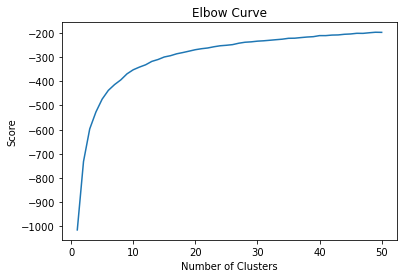

In [33]:
plt.plot(Nc, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

# from the graph, we need 10 clusters to describe team attributes.
# TODO verify this result with other methods

In [34]:
kmeans = KMeans(n_clusters = 10)
df_1['cluster'] = kmeans.fit_predict(df_2)
df_1['cluster'].value_counts(dropna = False)

9    197
3    197
4    181
0    134
1    131
8    119
2     93
6     91
5     70
7     50
Name: cluster, dtype: int64

In [35]:
df_1.to_csv("team_att_w_cluster.csv")